# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

The overall goal of this project is to develop a numerical solver for the following nonlinear diffusion-reaction problems which can stated as follows.

Find a function u(x,y,t) satisfying the initial value problem
\begin{alignat}{3}
\partial_t u - \kappa \Delta u + c(u) u &= f
&& \quad \text{in } \Omega  \times (t_0, T)
\subset \RR^2 \times \RR,
\tag{1a}
\\
u &= u_D && \quad  \text{on } \partial \Omega  \times (t_0, T)
\subset \RR^2 \times \RR
\tag{1b}
\\
u(\cdot,t_0) &= u_0
&&\quad \text{in } \Omega,
\tag{1c}
\end{alignat}

for some domain $\Omega \subset \RR^2$ and some time interval $[t_0, T] \subset \RR$.

As usual, $\Delta u$ denotes the usual Laplace operator
$$
\Delta u(x,y,t) = 
\partial^2_{x} u(x,y,t) + \partial^2_{y} u(x,y,t)
= 
\dfrac{\partial^2}{\partial x^2} u(x,y,t) 
+\dfrac{\partial^2}{\partial y^2} u(x,y,t) 
$$
and $\partial_t u(x,y,t = \dfrac{\partial}{\partial t} u(x,y,t)$.

Observe that the entire problem consist of the partial differential equation (1a)
which is supplement with some boundary condition at any relevant time, see (1b)
and some initial data given in (1c).

Such and  related problems describe for instance (as the name suggest)  diffusion and reaction in chemical systems, but occurr
also in biology (pattern development on fur, chemotactial motion of cells) and in many other fields. The term $-\kappa \Delta u$ typically models the
diffusion of some quantity, e.g. energy, chemical substance over time,
while the term $c(u) u$ typically models the change of the quantity due to some reaction. Without the term $c(u)$ this would be a just
the standard heat equation.

The development of a numerical method for (1a)-(1c) will divided into 3 steps/parts:

* First, we forget about time and the non-linear term $c(u)u$ and study how to discretize a stationary problem known as the __Poisson problem__
\begin{alignat*}{3}
-\Delta u &= f &&\quad \text{in } \Omega, 
\\
u &= u_D  && \quad\text{on } \partial \Omega. 
\end{alignat*} 
At the end we will be left with a task to solve linear system $AU = F$.
* Next, we develop a solver for the __classical heat equation__
\begin{alignat*}{3}
\partial_t u - \kappa \Delta u &= f
&& \quad \text{in } \Omega  \times (t_0, T)
\subset \RR^2 \times \RR,
\\
u &= u_D && \quad  \text{on } \partial \Omega  \times (t_0, T)
\subset \RR^2 \times \RR
\\
u(\cdot,t_0) &= u_0
&&\quad \text{in } \Omega,
\end{alignat*}
ignoring the non-linear term $c(u)u$. 
By using the techniques from step 1, we will end up with the task of
solving an ODE system of the
form
$$
\dot{U} + A U = F
$$
and then apply some of time-discretization techniques we started to study in Lecture 21 and 22. 
* Finally, we will apply similar techniques to reduce our original problem
to a non-linear ODE
$$
\dot{U} + A U + C(U)U = F
$$
and will combine time-stepping techniques with the solution techniques for non-linear
equations we learned about during this course (Newton's method and fix-point iteration schemes)

## Part 1: The Poisson Equation

The first part of the story contains 2 chapters. To demonstrate
the main ideas in the simplest possible way, we start to look
at 1D problem.

### Chapter 1: The two-point boundary value problem

We start our journey with the the following problem.
Let $[a,b] \subset \RR$ be a finite interval, together
with a function $f: [a, b] \to \RR$. Then the _two-point
boundary value problem_ is to find a $u: [a, b] \to \RR$
such that

\begin{gather}
- u''(x) = f(x) \quad \forall x \in (a,b),
\tag{1a}
\\
u(a) = u_a, \quad  u(b) = u_b
\tag{1b}
\end{gather}
where $u_a$ and $u_b$ are given values.

__For the rest of the the project we will 
assume that $a = 0, b = 1$ and $u_a = u_b = 0$.__

Note that so this is __second order__ ordinary differential equations and thus requires two addition values to determine a solution completely, one on each boundary point.

This is contrast of the initial value problem
\begin{align}
u' &= f(t,u(t)) \quad \forall\; t \in (0,1)
\\
u(0) &= u_0
\end{align}
we discussed in Lecture 21 and 22.

### Finite difference method: A way to solve the two-point  boundary problem numerically
Instead of trying to compute $u(x)$ exactly,
we will now try to compute a numerical approximation
$u_{\Delta}$ of $u(x)$. As many times before we start by 
defininig $n+1$ equally spaced points $\{x_i\}_{i=0}^n$ 
with a grid size $h = \tfrac{b-a}{n}$ so that
$$
x_i := a + i h \quad
\text{for } i = 0, 1, \ldots, n.
$$

Then the second order derivative $u''$ can be approximated by the
__central difference operator__ defined by

$$
\begin{align}
\partial^+ \partial^- u(x)
:=  \dfrac{u(x+h) - 2 u(x) + u(x-h)}
{h^2}
\approx u''(x) = -f(x)
\end{align}
$$

Recall that for  $u \in C^k([0,1])$, the 
Taylor expansion of $u$ around $x$ is given by
$$
u(x+h) = u(x) + h u'(x) + \dfrac{h^2}{2!} u''(x) 
%+\dfrac{h^3}{3!} u^{(3)}(x)
+ \ldots 
+ \dfrac{h^{k-1}}{(k-1)!} u^{(k-1)}(x)
+ \dfrac{h^{k}}{k!} u^{(k)}(\xi)
$$
for some $\xi \in (x,x+h)$. 
Since $u \in C^k([0,1])$, 
the remainder term  $\dfrac{h^k}{k!} u^{(k)}(\xi)$ is uniformly bounded with respect to $\xi$; that is,
$$
\max_{\xi \in [a,b]}|u^{(k)}(\xi)| \leqslant C.
$$

Thus we can simply write
$$
u(x+h) = u(x) + h u'(x) + \dfrac{h^2}{2!} u''(x) 
%+\dfrac{h^3}{3!} u^{(3)}(x)
+ \ldots 
+ \dfrac{h^{k-1}}{(k-1)!} u^{(k-1)}(x)
+ \mathcal{O}(h^{k})
$$

#### Task 1
Use Taylor expansion to show that
for 
$u \in C^4([0,1])$

$$
\max_{x \in [a,b]} | \partial^+ \partial^-u(x) - u''(x) |
=
\mathcal{O}(h^2).
$$

<font color="blue">
Solution:    
</font>

The taylor expansion for $u \in C^4[0, 1]$ is 
$$u(x+h)= u(x) + hu'(x) + \frac{h^2}{2!} u''(x) + \frac{h^3}{3!} u^{(3)}(x) + \frac{h^4}{4!} u^{(4)} (\xi)$$ 
$$u(x-h)= u(x) - hu'(x) + \frac{h^2}{2!} u''(x) - \frac{h^3}{3!} u^{(3)}(x) + \frac{h^4}{4!} u^{(4)} (\xi),$$ 

with $\xi \in [0,1]$. 
Since we have,

$$
\begin{align}
\partial^+ \partial^- u(x)
:=  \dfrac{u(x+h) - 2 u(x) + u(x-h)}
{h^2},
\end{align}
$$

we then get:
$$\partial^+\partial^- u(x) - u''(x) = \frac{u(x+h)-2u(x)+u(x-h)}{h^2} - u''(x) \\
= \frac{\left(u(x) + hu'(x) + \frac{h^2}{2!} u''(x) + \frac{h^3}{3!} u^{(3)}(x) + \frac{h^4}{4!} u^{(4)} (\xi)  -2u(x)  + u(x) - hu'(x) + \frac{h^2}{2!} u''(x) - \frac{h^3}{3!} u^{(3)}(x) + \frac{h^4}{4!} u^{(4)} (\xi)\right)}{h^2} - u''(x)\\
= \frac{2\frac{h^2}{2!}u''(x) + 2\frac{h^4}{4!}u^{(4)}}{h^2} - u''(x) = 2 \frac{h^2}{4!}u^{(4)}(\xi(x))=  \frac{h^2}{12}u^{(4)}(\xi(x))$$

Since we know $u^{(4)}(\xi(x)) = g(x)$ is continious on $[a,b]$ it must have a contstant maximum. 
$$max_{x \in[a,b]} |\partial^+\partial^- u(x) - u''(x)| = max_{x \in [a,b]}|\frac{h^2}{12}u^{(4)}(\xi(x))| =\frac{h^2}{12} max_{x \in [a,b]}|g(x)| = \frac{h^2}{12} C= O(h^2)$$




Now the idea is to numerically solve for the two-point boundary 
value problem by associating an unknown variable $U_i := u_{\Delta}(x_i)$ to every 
grid point $x_i$ for $i=0,\ldots N$. Of course, the goal
is to find an $U_i \approx u(x_i)$. Keeping in mind that $-u'' = f$,
we demand that at the __internal__ grid points $\{x_i\}_{i=1}^{N}$
the unknows satisfy

\begin{align}
-\partial^+\partial^- U_i
=
- \dfrac{U_{i+1} - 2 U_i + U_{i-1}}
{h^2}
= f(x_i) \quad \text{for } i = 1,\ldots N-1.
\end{align}

Note that at $x_0$ and $x_N$, $\partial^+\partial^- U_i$ is not well-defined
since we don't have a point left (respective right) of $x_0$ (respective $x_N$). This leads to the $N-1 \times N+1$ linear system of the form

\begin{align}
\dfrac{1}{h^2}
\underbrace{
\begin{bmatrix}
1 & 2  & -1 & & &
\\
  & -1 & 2  & -1 & & 
\\
  &    & -1 & 2 & -1 & & 
\\
 &     &    & \ddots &\ddots & \ddots &
\\
&      &    &        &  -1 & 2 & -1
\end{bmatrix}
}_{\widetilde{A}}
\underbrace{
\begin{bmatrix}
U_0
\\
U_1
\\
U_2
\\
U_3
\\
\vdots
\\
U_{N-1}
\\
U_N
\end{bmatrix}
}_{{U}}
=
\underbrace{
\begin{bmatrix}
f(x_1)
\\
f(x_2)
\\
f(x_3)
\\
\vdots
\\
f(x_{N-1})
\end{bmatrix}
}_{\widetilde{F}}
\end{align}

Out of reflex we immediately ask whether this system
is _always solvable_ and has a _unique solution_.
Unfortunately the matrix $\widetilde{A}$ above has a nontrivial kernel,
for instance $U_0 = U_1 = U_2 = \ldots U_{N-1} = U_N = c$ for any constant $c$. That's where the boundary conditions come into play!!

So to close the system, let's incorporate the boundary condition by setting
$$
U_0 = u_a, \quad U_{N} = u_b.
$$
These trivial equations can be added to the system above,
leading to final problem:

Find $U = [U_0, \ldots, U_N] \in \RR^{N+1}$ such that

\begin{align}
\dfrac{1}{h^2}
\underbrace{
\begin{bmatrix}
h^2
\\
1 & 2  & -1 & & &
\\
  & -1 & 2  & -1 & & 
\\
  &    & -1 & 2 & -1 & & 
\\
 &     &    & \ddots &\ddots & \ddots &
\\
&      &    &        &  -1 & 2 & -1
\\
&      &    &        &  &  & h^2
\end{bmatrix}
}_{{A}}
\underbrace{
\begin{bmatrix}
U_0
\\
U_1
\\
U_2
\\
U_3
\\
\vdots
\\
U_{N-1}
\\
U_{N}
\end{bmatrix}
}_{{U}}
=
\underbrace{
\begin{bmatrix}
u_0
\\
f(x_1)
\\
f(x_2)
\\
f(x_3)
\\
\vdots
\\
f(x_{N-1})
\\
u_b
\end{bmatrix}
}_{{F}}
\end{align}

#### Task 2
Implement a Python function ```fdm_poisson1d_matrix(N)``` which computes the finite difference
matrix for $N+1$ equally space points $\{x_i\}_{i=0}^{N}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def fdm_poisson1d_matrix(N):
    # Gridsize
    h = 1.0 / N

    # Define zero matrix A of right size and insert
    A = np.zeros((N +1, N + 1))

    # Define tridiagonal part of A
    hh = h * h

    for i in range(1, N):
        A[i,i-1] = -1/hh
        A[i,i] = 2/hh
        A[i, i+1] = -1/hh

    # Set a_00 = a_NN to 1 to incorporate boundary condition
    A[0,0] = 1
    A[N, N] = 1

    return A

Also, define a tiny function ```def apply_bcs(F, bcs)``` which incorporates the proper boundary values as described above, taking an vector $F$ and a list ```bcs = [u_a, u_b]``` and modifying $F$
accordingly.

In [3]:
def apply_bcs(F, bcs):
    F[0] = bcs[0]
    F[-1] = bcs[1]
    return F
    

#### Task 3
Now, you should test your implementation by solving the two-point boundary problem (1a)--(1b) numerically.

Apply the method of __manufactured solutions__: Take a known function $u(x)$ and 
compute corresponding data $f$ and $u_a$, $u_b$ such that $u$ is the solution to 
the two-point two-point boundary problem (1a)--(1b).

For example you can pick $u(x) = \sin(2\pi x)$. What is then $f = - u''$,
$u_a = u(0)$, $u_b = u(1)$?

After having picked your favorite (smooth) manufactured solution,
you can compute the error 
$$
\mathrm{err(h)} = \mathrm{err(N)} = \max_{i \in \{0,\ldots N\}}|U_i - u(x_i)|
$$
as a function of $h = 1/N$.

For $N_1 = 5, N_2= 10, N_3 = 20, N_4 = 40, N_5 =80$
* compute and plot the numerical solution and the analytical solution
* record the resulting $\mathrm{err(N)}$

At the end of your experiment, compute the __experimental order of convergence__ 
for each refinement level $N_2, \ldots, N_5$ defined
$$
EOC(N_i) = \dfrac{\log(\mathrm{err}(N_i)) - \log(\mathrm{err}(N_{i-1}))}
{\log(N_{i-1}) - \log(N_i)}
$$

What order of convergence do you get?

SETT PÅ AKSETITLER OG TILTLER PÅ ALLE PLOTTENE!! 

<IPython.core.display.Javascript object>


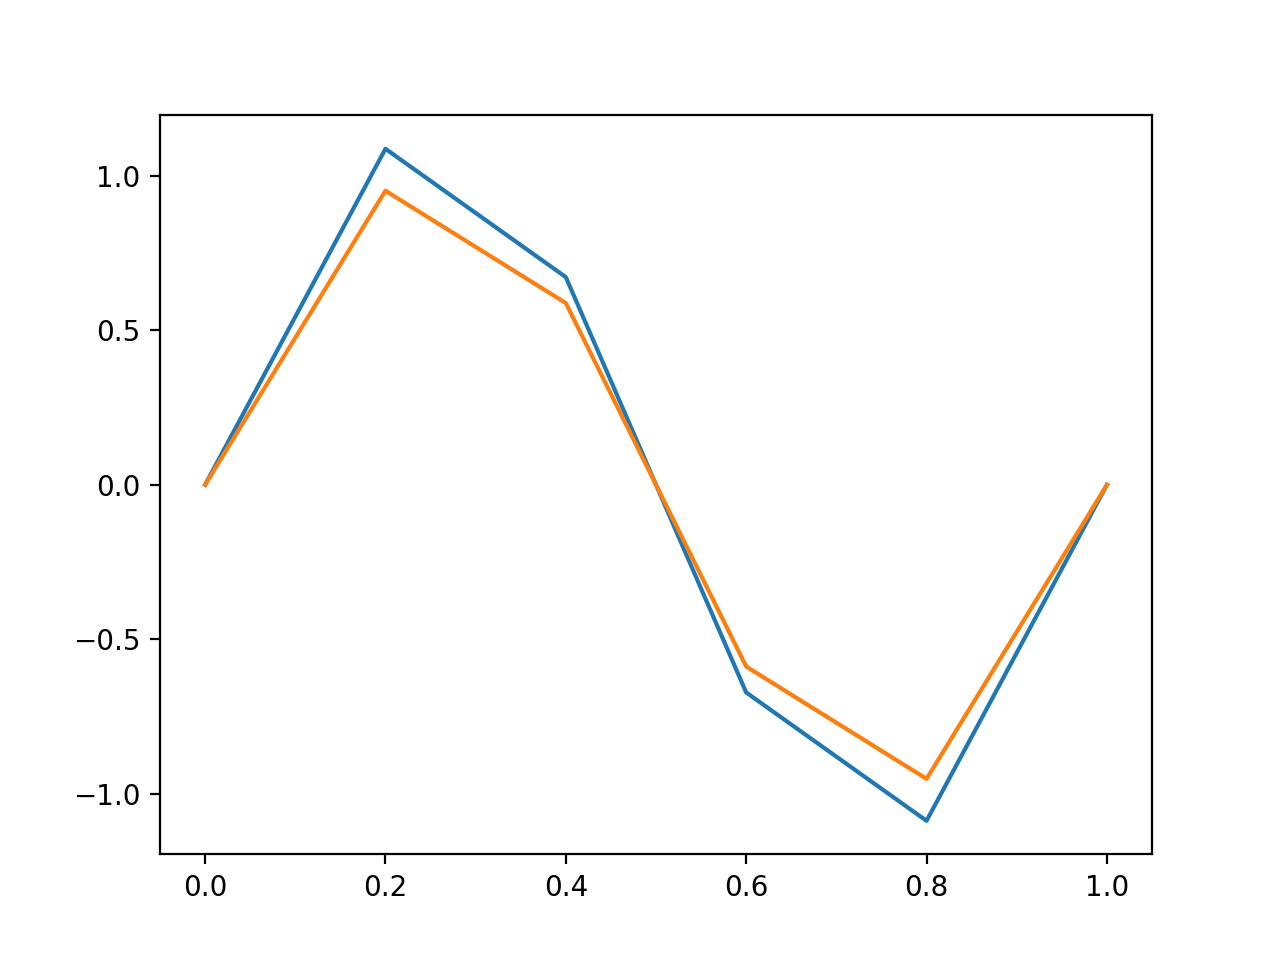

<IPython.core.display.Javascript object>


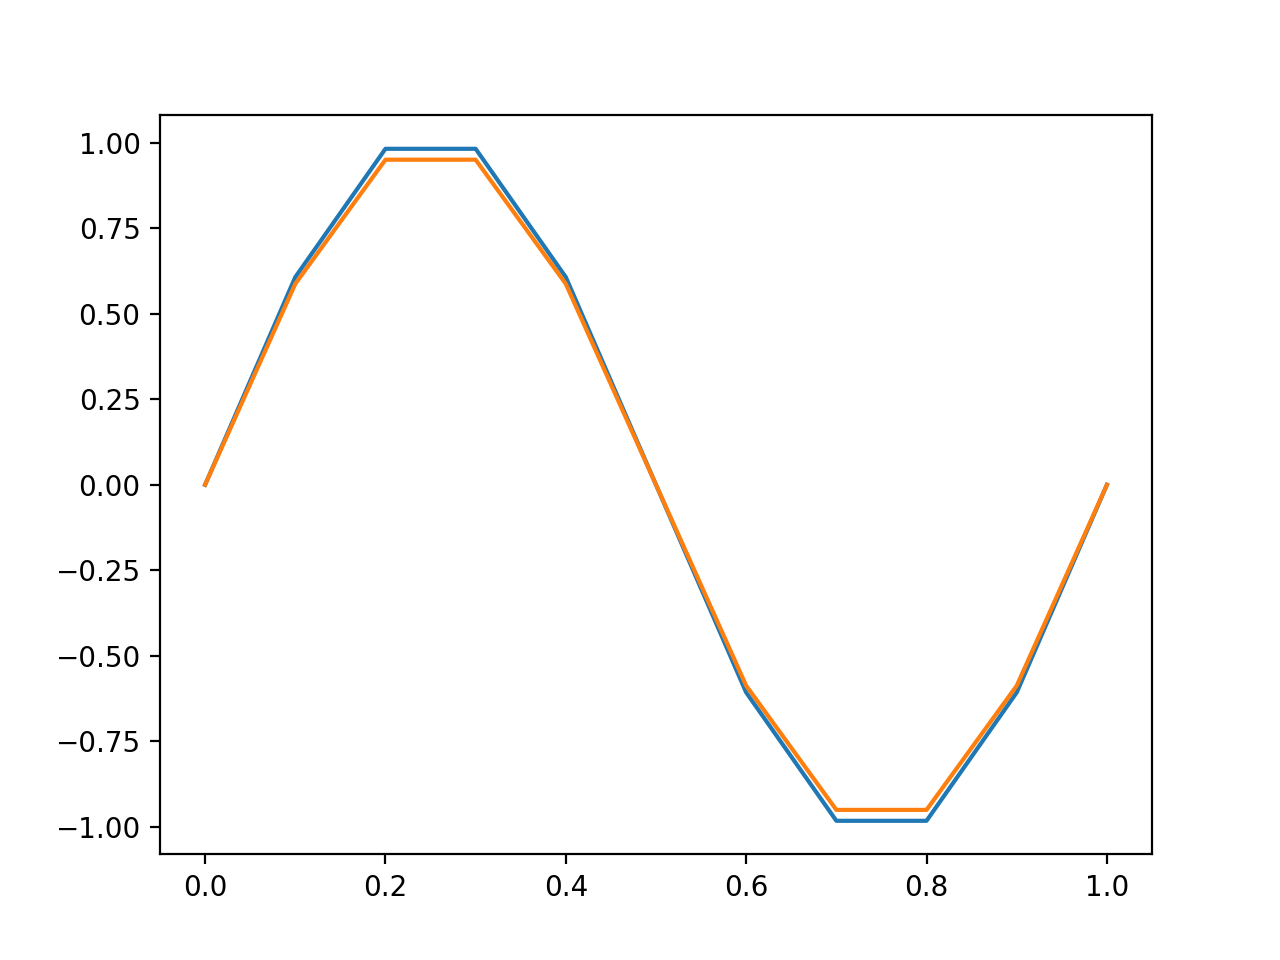

<IPython.core.display.Javascript object>


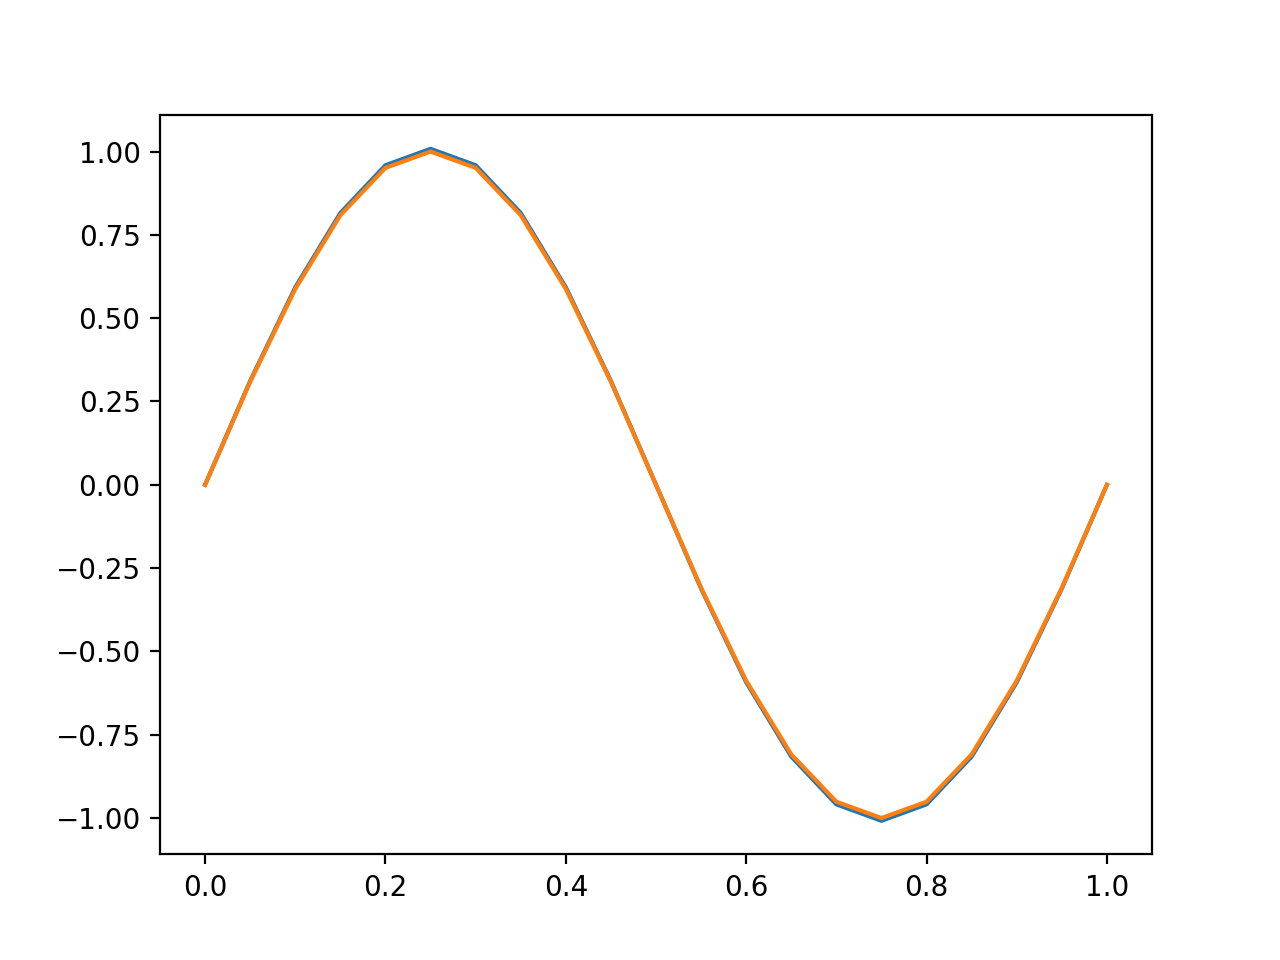

<IPython.core.display.Javascript object>


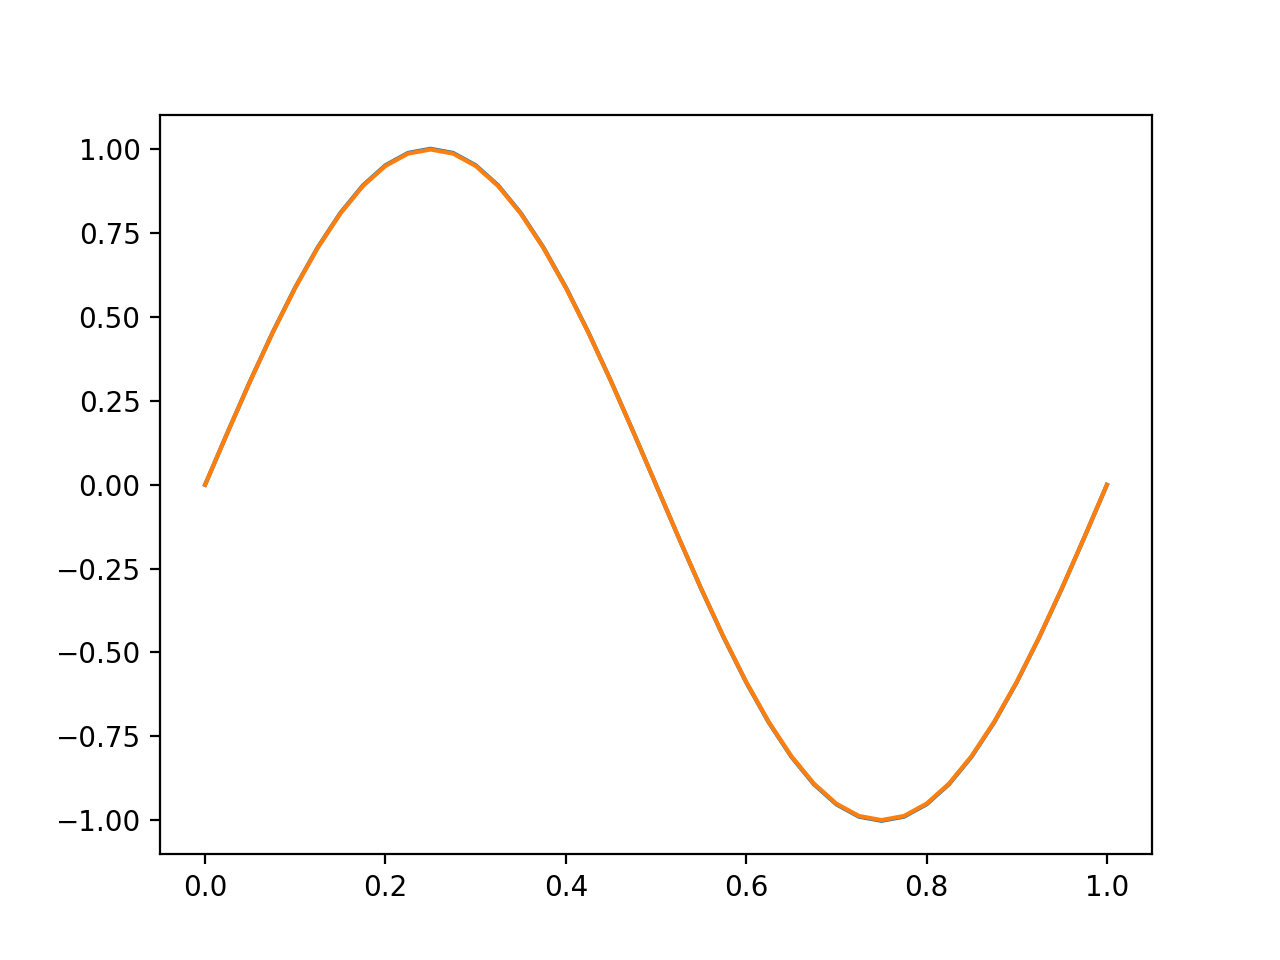

<IPython.core.display.Javascript object>


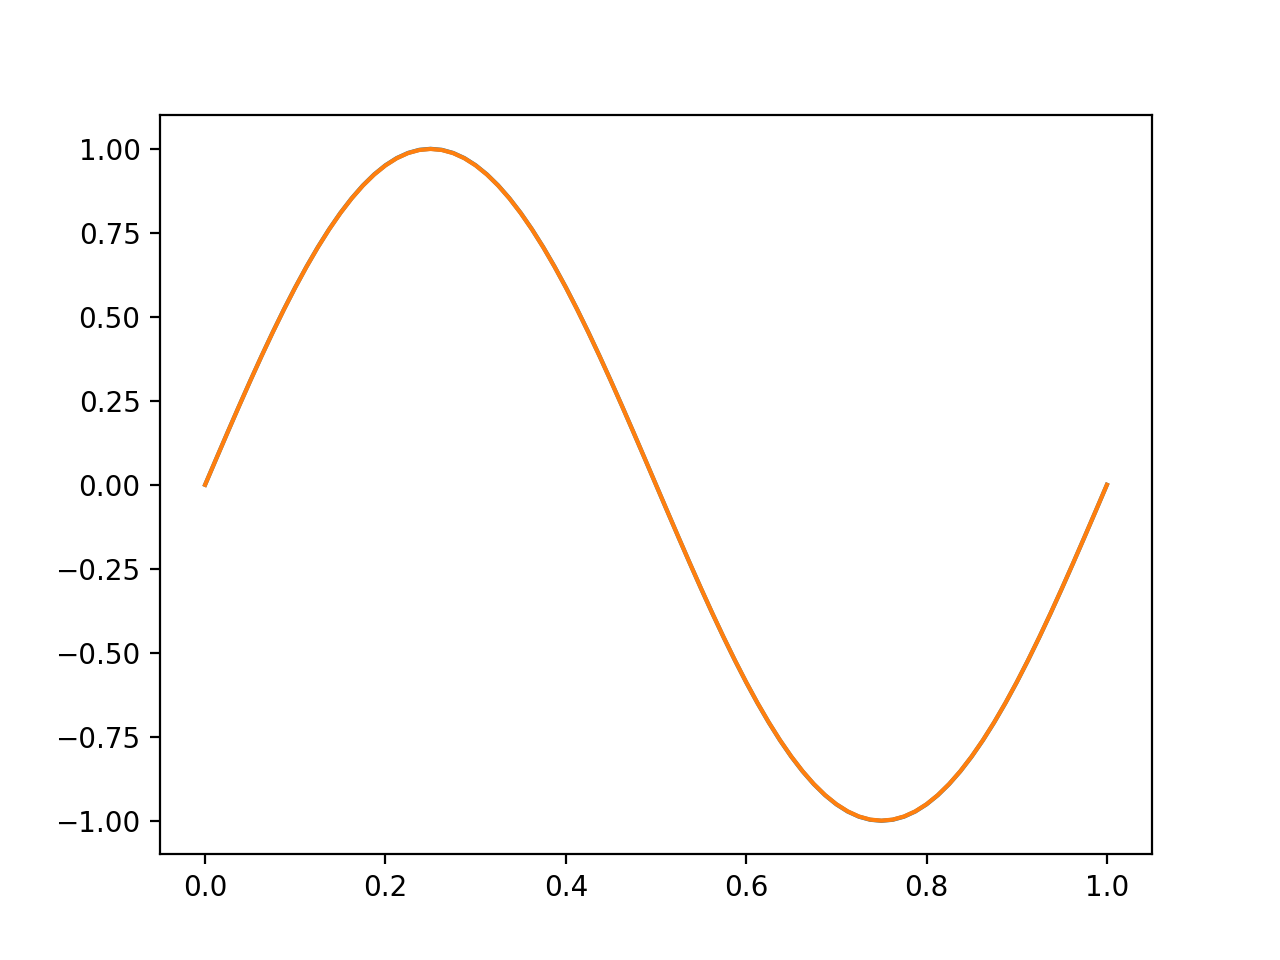

<IPython.core.display.Javascript object>


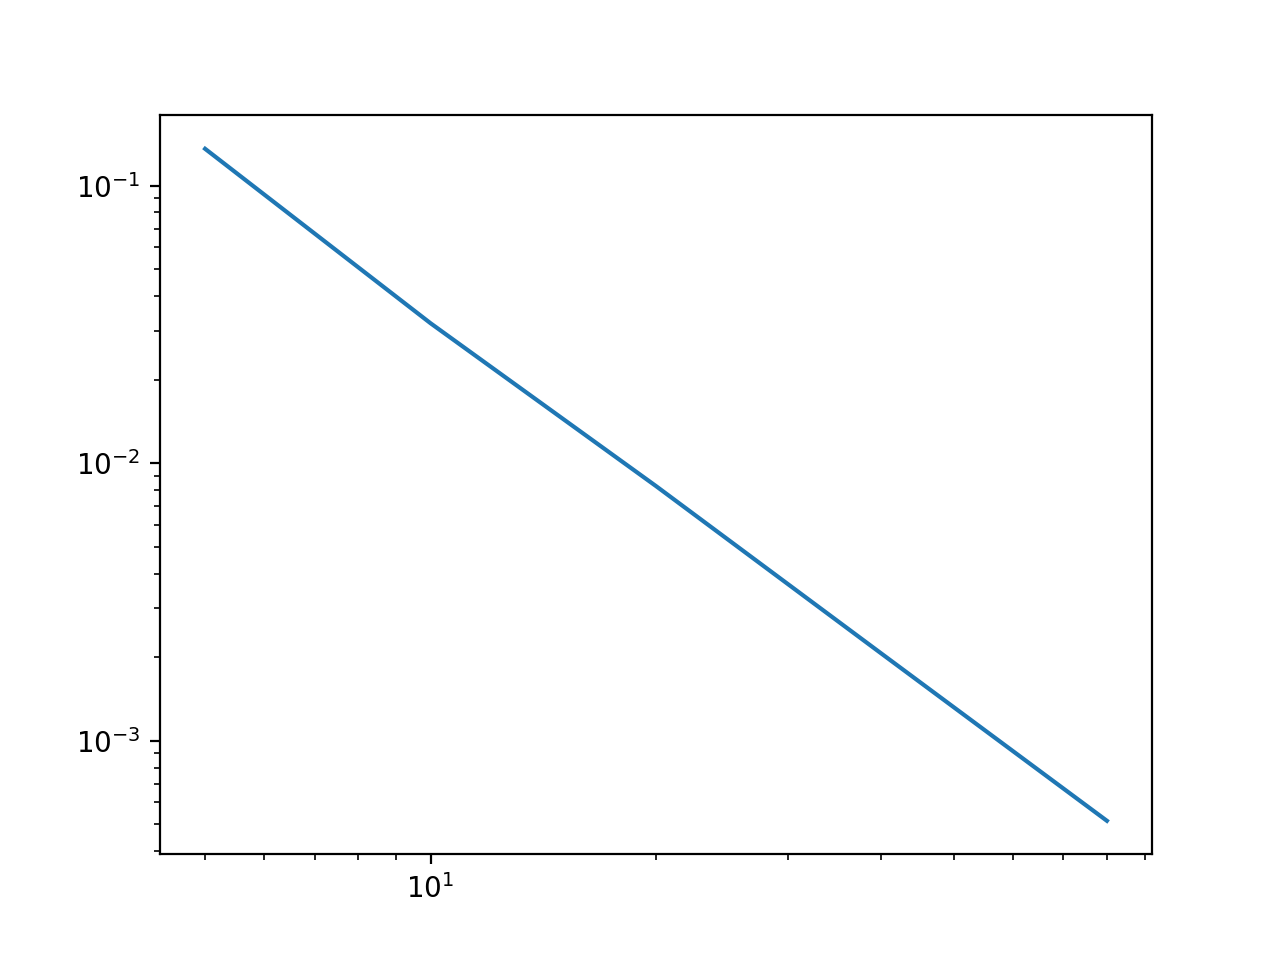

Experimental order of convergence
[2.087977539294521, 1.9491170242964597, 2.005349249283874, 2.001335494985112]


<IPython.core.display.Javascript object>


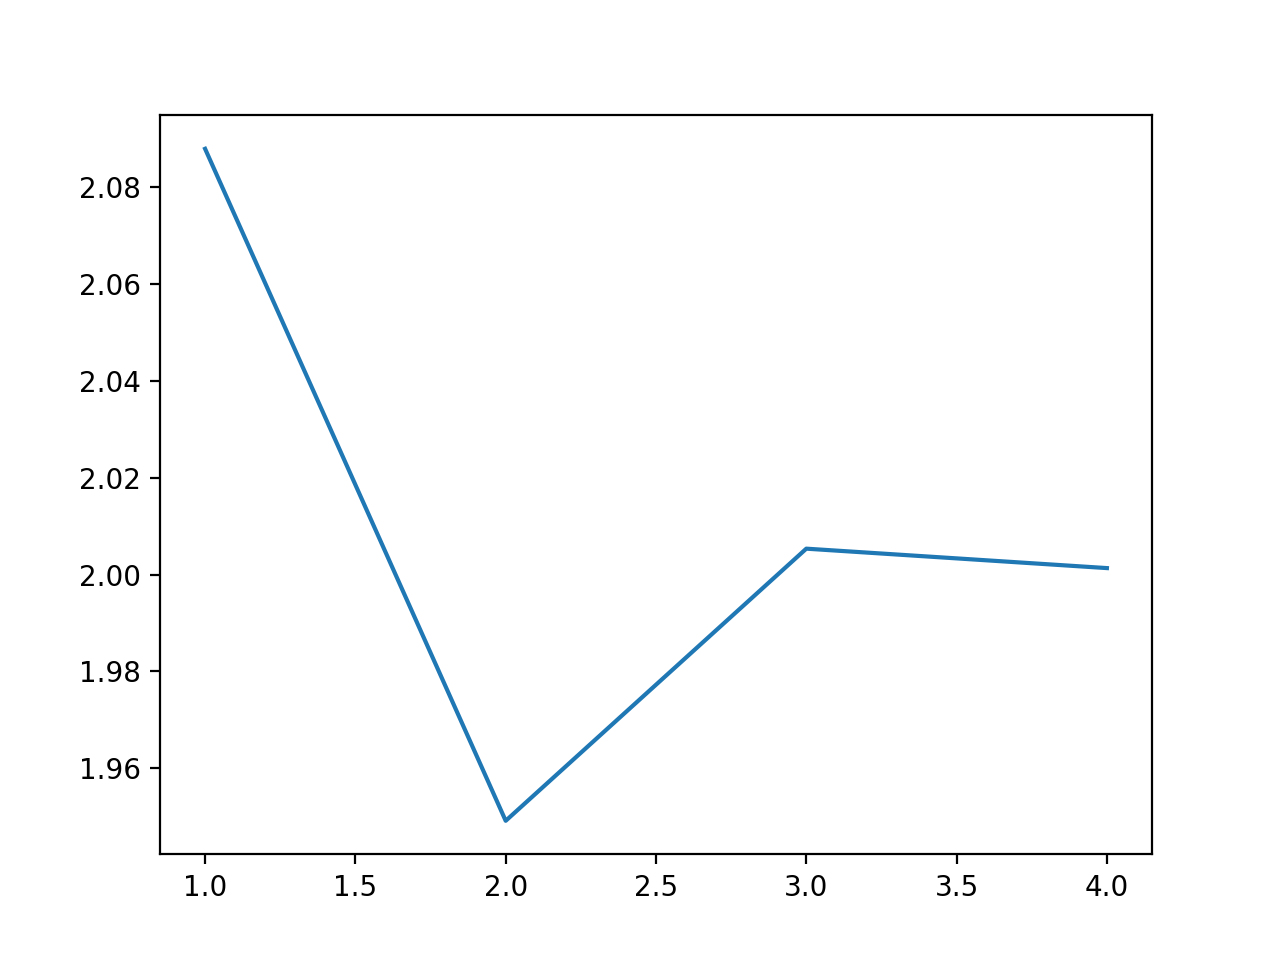

In [5]:
%matplotlib notebook
import scipy.linalg as la

# Analytical reference solution
u = lambda x: np.sin(2*np.pi*x)

# Right-hand side
f = lambda x: 4*np.pi**2*np.sin(2*np.pi*x) #BLIR RETT NÅR VI BYTTER FORTEGN
# Boundary conditions as list
bcs = [0,0]

# Number of subintervals = number of mesh points - 1
# Collect grid sizes and errors
hs = [5, 10, 20, 40, 80]
errs = []

for N in [5, 10, 20, 40, 80]:

    # Define grid points
    x = np.linspace(0, 1, N+1)

    # Compute A and F
    A = fdm_poisson1d_matrix(N)

    F = f(x)

    # Incorporate bcs
    apply_bcs(F, bcs)

    # Solve AU = F
    U = la.solve(A, F)

    # Compute real solution and error at grid points and maximum error
    u_real = u(x)
    error_max = max(abs(U-u(x)))
    errs.append(error_max)

    # Plot discrete and analytical solution on chosen discretization grid
    plt.figure()
    plt.plot(x, U)
    plt.plot(x, u_real)
    plt.show()

# Finally compute eoc
def eoc(i):
    return ((np.log(errs[i]) - np.log(errs[i-1]))/((np.log(hs[i-1]))-np.log(hs[i]))) # Ni = hs[i]

#list og eoc values
eoc_list = []

for i in range(1,5):
    eoc_list.append(eoc(i))
    
#loglog plot of maximum error against N
plt.figure()
plt.loglog(hs, errs)
plt.show()

print ("Experimental order of convergence")
print(eoc_list)

plt.figure()
plt.plot([1,2,3,4], eoc_list) 
plt.show()

plt.show()

<font color="blue">
Solution:    
</font>

As one can see from the vector with experimental order of convergence (eoc) we get  eoc approximately equal to two.  

We know that the error estimates with respect to $h$ and $N$ are $ err_h(h) = Ch^p$ and $ err_N(N) = CN^{-p}$ for $N = 1/h$ and p = order of convergence. 

We see that 
$$
\log err_{N_i}(N) = \log(C) -p\log(N_i)
$$
and
$$
\log err_{N_{i-1}}(N_{i-1}) = \log(C) -p\log(N_{i-1}).
$$
When substracting these from each other we get,

$$
\log err_{N_i}(N) - \log err_{N_{i-1}}(N_{i-1})  = \log(C) -p \log(N_i) -(\log(C) -p \log(N_i)) = p \log(N_{i-1}) - p \log(N_i) = p(\log(N_{i-1})-\log(N_{i})).
$$

$\Rightarrow$

$$
p = \frac{\log (err_{N_i}(N) - err_{N_{i-1}}(N_{i-1})}{(\log(N_{i-1})-\log(N_{i}))}
$$

This means that $ err_h(h) = Ch^2$ (with $p \approx eoc$) meaning we have an approximat order of convergence equal to two which coincides with the what we computed in task 1a). 

#### Outlook

Before we turn to more interesting 2D problem, we have a quick look at a slightly modified version of the two-point problem (1a)-(1b).
Later when you are asked to solve some time-dependent problem,
you will have solve at each time-step with time-step size $\tau$
a problem similar to the form

\begin{gather}
u - \tau u''(x) = f(x) \quad \forall x \in (a,b),
\tag{3a}
\\
u(a) = u_a, \quad  u(b) = u_b
\tag{2b}
\end{gather}
where $u_a$ and $u_b$ are given values.
This problem can also be solved numerically using the finite difference method resulting in the problem in the system of equations

\begin{align}
U_i 
- \tau  \dfrac{U_{i+1} - 2 U_i + U_{i-1}}
{h^2}
= f(x_i) \quad \text{for } i = 1,\ldots N-1.
\end{align}
The boundary condition can be incorporated as before,
leading to the problem

Find $U = [U_0, \ldots, U_N] \in \RR^{N+1}$ such that
$$
(\Id + \tau A) U = F 
$$
or in more verbose form,
\begin{align*}
\left(
\begin{bmatrix}
1
\\
 & 1  &  & & &
\\
  &  & 1  & & & 
\\
  &    &  &  1&  & & 
\\
 &     &    &  &\ddots & &
\\
&      &    &        &   & 1 & 
\\
&      &    &        &  &  & 1
\end{bmatrix}
+
\dfrac{\tau}{h^2}
\begin{bmatrix}
0
\\
1 & 2  & -1 & & &
\\
  & -1 & 2  & -1 & & 
\\
  &    & -1 & 2 & -1 & & 
\\
 &     &    & \ddots &\ddots & \ddots &
\\
&      &    &        &  -1 & 2 & -1
\\
&      &    &        &  &  & 0
\end{bmatrix}
\right)
\begin{bmatrix}
U_0
\\
U_1
\\
U_2
\\
U_3
\\
\vdots
\\
U_{N-1}
\\
U_{N}
\end{bmatrix}
=
\begin{bmatrix}
u_0
\\
f(x_1)
\\
f(x_2)
\\
f(x_3)
\\
\vdots
\\
f(x_{N-1})
\\
u_b
\end{bmatrix}
\end{align*}
So
$\Id \in \RR^{N+1,N+1}$ is the identity matrix, $F$ is
exactly defined as before __including__ the boundary conditions,
but $A \in \RR^{N+1,N+1}$ corresponds to the finite difference matrix
__without the modification__ to incorporate the equations for the boundary conditions
\begin{align*}
A = 
\dfrac{1}{h^2}
\begin{bmatrix}
0
\\
1 & 2  & -1 & & &
\\
  & -1 & 2  & -1 & & 
\\
  &    & -1 & 2 & -1 & & 
\\
 &     &    & \ddots &\ddots & \ddots &
\\
&      &    &        &  -1 & 2 & -1
\\
&      &    &        &  &  & 0
\end{bmatrix}.
\end{align*}